In [7]:
import pandas as pd
import re
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

plt.style.use('./deeplearning.mplstyle')
RANDOM_STATE = 30

In [8]:
df = pd.read_csv("new_sample_malicious_url.csv")
# df.head()

In [9]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['type'])
print(label_encoder.classes_)

['benign' 'harmful']


In [10]:
# Exclude the target column
features = [x for x in df.columns if x != 'type']  # Exclude 'type' column
print(len(features))

7


In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.2, random_state=42)

print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 1440
validation samples: 360
target proportion: 0.5014


In [12]:
# Building random forest tree 
# min_samples_split: The minimum number of samples required to split an internal ndoe
# max_depth: The maximum depth of the tree
# An additionaly hyperparameter for Random Forest is called n_estimators, which is the 
# number of Decision Tress that make up the Random Forest

min_samples_split_list = [2, 5, 10, 15, 20, 30, 40, 50, 60, 80, 100, 150, 200, 250, 300, 700]
max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 16, 20, 32, 40, 64, None]
n_estimators_list = [10, 20, 50, 75, 100, 200, 500, 1000]

In [13]:
# Min Samples Split

accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:

    model = RandomForestClassifier(min_samples_split=min_samples_split,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"min_samples_split={min_samples_split}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

# plt.title('Train x Validation metrics')
# plt.xlabel('min_samples_split')
# plt.ylabel('accuracy')
# plt.xticks(ticks= range(len(min_samples_split_list)), labels=min_samples_split_list)
# plt.plot(accuracy_list_train)
# plt.plot(accuracy_list_val)
# plt.legend(['Train', 'Validation'])

min_samples_split=2, Train Accuracy=0.9924, Validation Accuracy=0.8722
min_samples_split=5, Train Accuracy=0.9743, Validation Accuracy=0.8861
min_samples_split=10, Train Accuracy=0.9528, Validation Accuracy=0.8944
min_samples_split=15, Train Accuracy=0.9424, Validation Accuracy=0.8917
min_samples_split=20, Train Accuracy=0.9368, Validation Accuracy=0.8861
min_samples_split=30, Train Accuracy=0.9194, Validation Accuracy=0.8806
min_samples_split=40, Train Accuracy=0.9153, Validation Accuracy=0.8694
min_samples_split=50, Train Accuracy=0.9083, Validation Accuracy=0.8611
min_samples_split=60, Train Accuracy=0.9000, Validation Accuracy=0.8583
min_samples_split=80, Train Accuracy=0.8819, Validation Accuracy=0.8528
min_samples_split=100, Train Accuracy=0.8625, Validation Accuracy=0.8417
min_samples_split=150, Train Accuracy=0.8382, Validation Accuracy=0.8028
min_samples_split=200, Train Accuracy=0.8306, Validation Accuracy=0.8028
min_samples_split=250, Train Accuracy=0.7993, Validation Accura

In [14]:
# Max depth

accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:

    model = RandomForestClassifier(max_depth=max_depth,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"max_depth={max_depth}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

# plt.title('Train x Validation metrics')
# plt.xlabel('max_depth')
# plt.ylabel('accuracy')
# plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
# plt.plot(accuracy_list_train)
# plt.plot(accuracy_list_val)
# plt.legend(['Train','Validation'])

max_depth=1, Train Accuracy=0.7549, Validation Accuracy=0.7389
max_depth=2, Train Accuracy=0.7757, Validation Accuracy=0.7639
max_depth=3, Train Accuracy=0.8201, Validation Accuracy=0.7806
max_depth=4, Train Accuracy=0.8396, Validation Accuracy=0.8167
max_depth=5, Train Accuracy=0.8701, Validation Accuracy=0.8333
max_depth=6, Train Accuracy=0.8917, Validation Accuracy=0.8444
max_depth=7, Train Accuracy=0.9215, Validation Accuracy=0.8694
max_depth=8, Train Accuracy=0.9382, Validation Accuracy=0.8667
max_depth=10, Train Accuracy=0.9674, Validation Accuracy=0.8778
max_depth=12, Train Accuracy=0.9826, Validation Accuracy=0.8722
max_depth=16, Train Accuracy=0.9917, Validation Accuracy=0.8889
max_depth=20, Train Accuracy=0.9924, Validation Accuracy=0.8694
max_depth=32, Train Accuracy=0.9924, Validation Accuracy=0.8722
max_depth=40, Train Accuracy=0.9924, Validation Accuracy=0.8722
max_depth=64, Train Accuracy=0.9924, Validation Accuracy=0.8722
max_depth=None, Train Accuracy=0.9924, Validatio

In [15]:
# N Estimators

accuracy_list_train = []
accuracy_list_val = []

for n_estimators in n_estimators_list:

    model = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"n_estimators={n_estimators}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

# plt.title('Train x Validation metrics')
# plt.xlabel('n_estimators')
# plt.ylabel('accuracy')
# plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
# plt.plot(accuracy_list_train)
# plt.plot(accuracy_list_val)
# plt.legend(['Train','Validation'])

n_estimators=10, Train Accuracy=0.9868, Validation Accuracy=0.8889
n_estimators=20, Train Accuracy=0.9889, Validation Accuracy=0.8694
n_estimators=50, Train Accuracy=0.9924, Validation Accuracy=0.8639
n_estimators=75, Train Accuracy=0.9924, Validation Accuracy=0.8722
n_estimators=100, Train Accuracy=0.9924, Validation Accuracy=0.8722
n_estimators=200, Train Accuracy=0.9924, Validation Accuracy=0.8806
n_estimators=500, Train Accuracy=0.9924, Validation Accuracy=0.8889
n_estimators=1000, Train Accuracy=0.9924, Validation Accuracy=0.8806


In [16]:
random_forest_model = RandomForestClassifier(n_estimators = 200,
                                             max_depth = 10, 
                                             min_samples_split = 5).fit(X_train,y_train)

In [17]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9528
Metrics test:
	Accuracy score: 0.8917


In [18]:
n = int(len(X_train)*0.8)
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [19]:
eval_set = [(X_train_eval,y_train_eval)]
# early_stopping_rounds = 10

# This code builds and trains a smart model to make predictions, and it tries to avoid overfitting by stopping early if the model stops improving.
xgb_model = XGBClassifier(n_estimators = 200, learning_rate = 0.05,verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds=10)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.66887
[1]	validation_0-logloss:0.64682
[2]	validation_0-logloss:0.62697
[3]	validation_0-logloss:0.60842
[4]	validation_0-logloss:0.59169
[5]	validation_0-logloss:0.57671
[6]	validation_0-logloss:0.56290
[7]	validation_0-logloss:0.54981
[8]	validation_0-logloss:0.53739
[9]	validation_0-logloss:0.52692
[10]	validation_0-logloss:0.51726
[11]	validation_0-logloss:0.50723
[12]	validation_0-logloss:0.49774
[13]	validation_0-logloss:0.48791
[14]	validation_0-logloss:0.48149
[15]	validation_0-logloss:0.47492
[16]	validation_0-logloss:0.46827
[17]	validation_0-logloss:0.46230
[18]	validation_0-logloss:0.45596
[19]	validation_0-logloss:0.44801
[20]	validation_0-logloss:0.44307
[21]	validation_0-logloss:0.43871
[22]	validation_0-logloss:0.43507
[23]	validation_0-logloss:0.43216
[24]	validation_0-logloss:0.42929
[25]	validation_0-logloss:0.42508
[26]	validation_0-logloss:0.41896
[27]	validation_0-logloss:0.41346
[28]	validation_0-logloss:0.40795
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=30, ...)

In [20]:
xgb_model.best_iteration

97

In [21]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train), y_train):.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test), y_test):.4f}")

Metrics train:
	Accuracy score: 0.9382
Metrics test:
	Accuracy score: 0.8889


[[166  16]
 [ 24 154]]


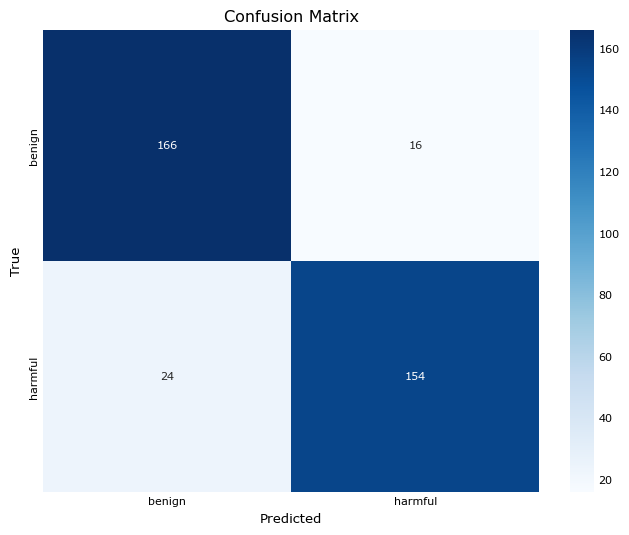

In [22]:
cm = confusion_matrix(y_test, xgb_model.predict(X_test))
print(cm)
# Get the confusion matrix
cm = confusion_matrix(y_test, xgb_model.predict(X_test))

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [23]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       182
           1       0.91      0.87      0.89       178

    accuracy                           0.89       360
   macro avg       0.89      0.89      0.89       360
weighted avg       0.89      0.89      0.89       360



In [24]:
def extract_features(url):
    feature = {}
    feature['url_length'] = len(url)
    feature['num_special_chars'] = sum(1 for c in url if c in ['?', '=', '&', '%', '@', '-', '_'])
    feature['num_digit'] = sum(c.isdigit() for c in url)
    feature['num_subdomains'] = url.count('.')
    parsed_url = urlparse(url)
    feature['path_length'] = len(parsed_url.path)
    feature['num_path_segments'] = parsed_url.path.count('/')
    suspicious_keywords = ['pay', '.io', 'login', 'secure', 'wallet', 'auth', 'support', 'block']
    feature['num_suspicious_keywords'] = sum(1 for keyword in suspicious_keywords if keyword in url)
    return feature

In [25]:
url = "https://eezxodullgeunn.webflow.io" # phishing
# url = "meliksahbardakci.com/components/index.htm" # Supposedly safe

new_features = extract_features(url)

new_features_df = pd.DataFrame([new_features])
# print(new_features_df)

prediction = random_forest_model.predict(new_features_df)

predicted_class = label_encoder.inverse_transform(prediction)

# Output the prediction
print(f"Prediction for URL '{url}' -> {predicted_class[0]}")

Prediction for URL 'https://eezxodullgeunn.webflow.io' -> harmful


                   Feature    Importance
4              path_length  2.388889e-01
0               url_length  1.138889e-01
3           num_subdomains  1.111111e-01
5        num_path_segments  4.000000e-02
1        num_special_chars  2.555556e-02
6  num_suspicious_keywords  5.555556e-04
2                num_digit -2.220446e-17


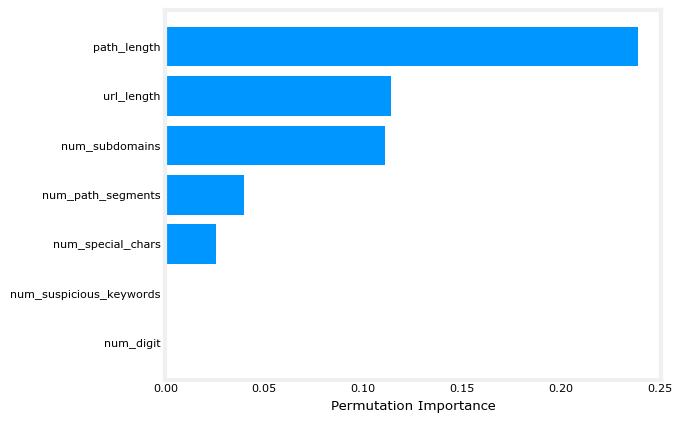

In [26]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, scoring="accuracy")

importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

print(importance_df)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [31]:
# import joblib
# joblib.dump(xgb_model, "url_model.joblib")

xgb_model.save_model("url_model.json")